In [1]:
import pyart
import netCDF4 as nc
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FuncFormatter, MultipleLocator 
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import StadiaMapsTiles
from cartopy.mpl.gridliner import LatitudeFormatter, LongitudeFormatter



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Load the NetCDF file
file_path = 'Aug24_L2B\RCTLS_31JUL2024_000832_L2B_STD.nc'
dataset = nc.Dataset(file_path) #L2B
file_path_normalize = 'Aug24_L2C\RCTLS_31JUL2024_001453_L2C_STD.nc'
dataset_normalize = nc.Dataset(file_path_normalize) #L2C

In [4]:
dbz, vel = load_and_preprocess_data(file_path_normalize)
norm_dbz = normalize_radar_data(dbz, 'DBZ')


In [3]:
print("Raw Dataset - ")
print("Variables : ",dataset.variables.keys())
print("Dimensions : ",dataset.dimensions)

Raw Dataset - 
Variables :  dict_keys(['time_coverage_start', 'time_coverage_end', 'time', 'range', 'latitude', 'longitude', 'altitude', 'PolType', 'sweep_number', 'sweep_mode', 'fixed_angle', 'sweep_start_ray_index', 'sweep_end_ray_index', 'azimuth', 'elevation', 'DBZ', 'VEL', 'WIDTH', 'ZDR', 'PHIDP', 'RHOHV'])
Dimensions :  {'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1080, 'range': <class 'netCDF4._netCDF4.Dimension'>: name = 'range', size = 1216, 'sweep': <class 'netCDF4._netCDF4.Dimension'>: name = 'sweep', size = 3, 'string_length': <class 'netCDF4._netCDF4.Dimension'>: name = 'string_length', size = 32, 'poltype': <class 'netCDF4._netCDF4.Dimension'>: name = 'poltype', size = 32}


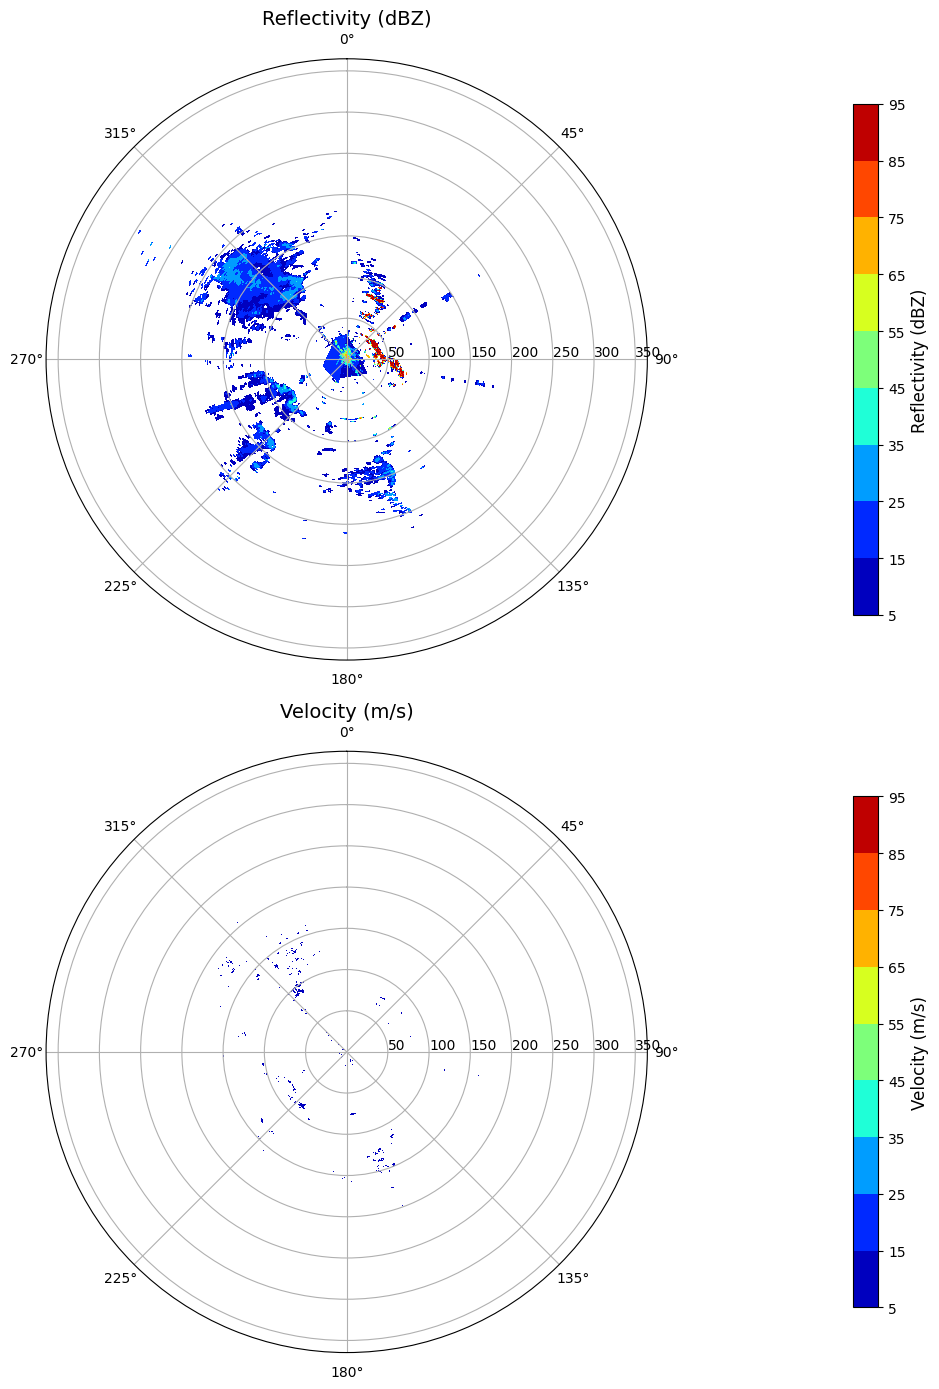

In [4]:
# Extract relevant variables
azimuth = dataset.variables['azimuth'][:]  # degrees
range_data = dataset.variables['range'][:]  # meters

# Convert range to kilometers
range_km = range_data / 1000.0

# Convert azimuth to radians for plotting
azimuth_rad = np.deg2rad(azimuth)

# Variables to plot
variables = {
    'Reflectivity (dBZ)': dataset.variables['DBZ'][:],
    'Velocity (m/s)': dataset.variables['VEL'][:],
}

# Create a figure with subplots for each variable
fig, axs = plt.subplots(nrows=2, figsize=(14, 14), subplot_kw={'projection': 'polar'})

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Plot each variable
for i, (var_name, data) in enumerate(variables.items()):
    # Plot the data
    c = axs[i].contourf(azimuth_rad, range_km, data.T, levels=range(5, 105, 10), cmap='jet')

    # Set plot labels and title
    axs[i].set_title(var_name, fontsize=14)
    axs[i].set_theta_zero_location('N')
    axs[i].set_theta_direction(-1)
    axs[i].set_rlabel_position(90)
    axs[i].grid(True)

    # Add a colorbar with the correct positioning
    cb = fig.colorbar(c, ax=axs[i], pad=0.15, shrink=0.85)
    cb.set_label(var_name, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [5]:
print("Processed Dataset - ")
print("Variables : ",dataset_normalize.variables.keys())
print("Dimensions : ",dataset_normalize.dimensions)

Processed Dataset - 
Variables :  dict_keys(['time', 'height', 'latitude', 'longitude', 'DBZ', 'VEL'])
Dimensions :  {'height': <class 'netCDF4._netCDF4.Dimension'>: name = 'height', size = 81, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 481, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 481, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1}


In [5]:
dataset_normalize.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     long_name: time_in_hours_since_reference_time
     standard_name: time
     units: minutes since 2024-07-31 00:14:53
     calendar: standard
 unlimited dimensions: time
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'height': <class 'netCDF4._netCDF4.Variable'>
 int32 height(height)
     long_name: height
     standard_name: height
     units: meters
     positive: up
 unlimited dimensions: 
 current shape = (81,)
 filling on, default _FillValue of -2147483647 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float16 latitude(lat)
     long_name: latitude
     standard_name: latitude
     units: degrees_north
 unlimited dimensions: 
 current shape = (481,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float16 longitude(lon)
     long_name: longitude
     standard_name: longitude
     units: degrees_east
 u

In [7]:
# Extract the required features 
reflectivity = dataset_normalize['DBZ'][:]
radial_velocity = dataset_normalize['VEL'][:]
latitude = dataset_normalize['latitude'][:]
longitude = dataset_normalize['longitude'][:]
heights = dataset_normalize['height'][:]
time = dataset_normalize['time'][:]

In [3]:
dbz = dataset_normalize['DBZ'][:]
ds = dbz[~dbz.mask]
vel = dataset_normalize['VEL'][:]
vel = vel[~vel.mask]

In [8]:
# Visualize Reflectivity
ref1 = np.squeeze(reflectivity, axis=0)
ref2 = np.nanmax(ref1, axis=0)
refxz = np.nanmax(ref1, axis=2)
refyz = np.nanmax(ref1, axis=1)
refyz1 = np.moveaxis(refyz, 0,-1)

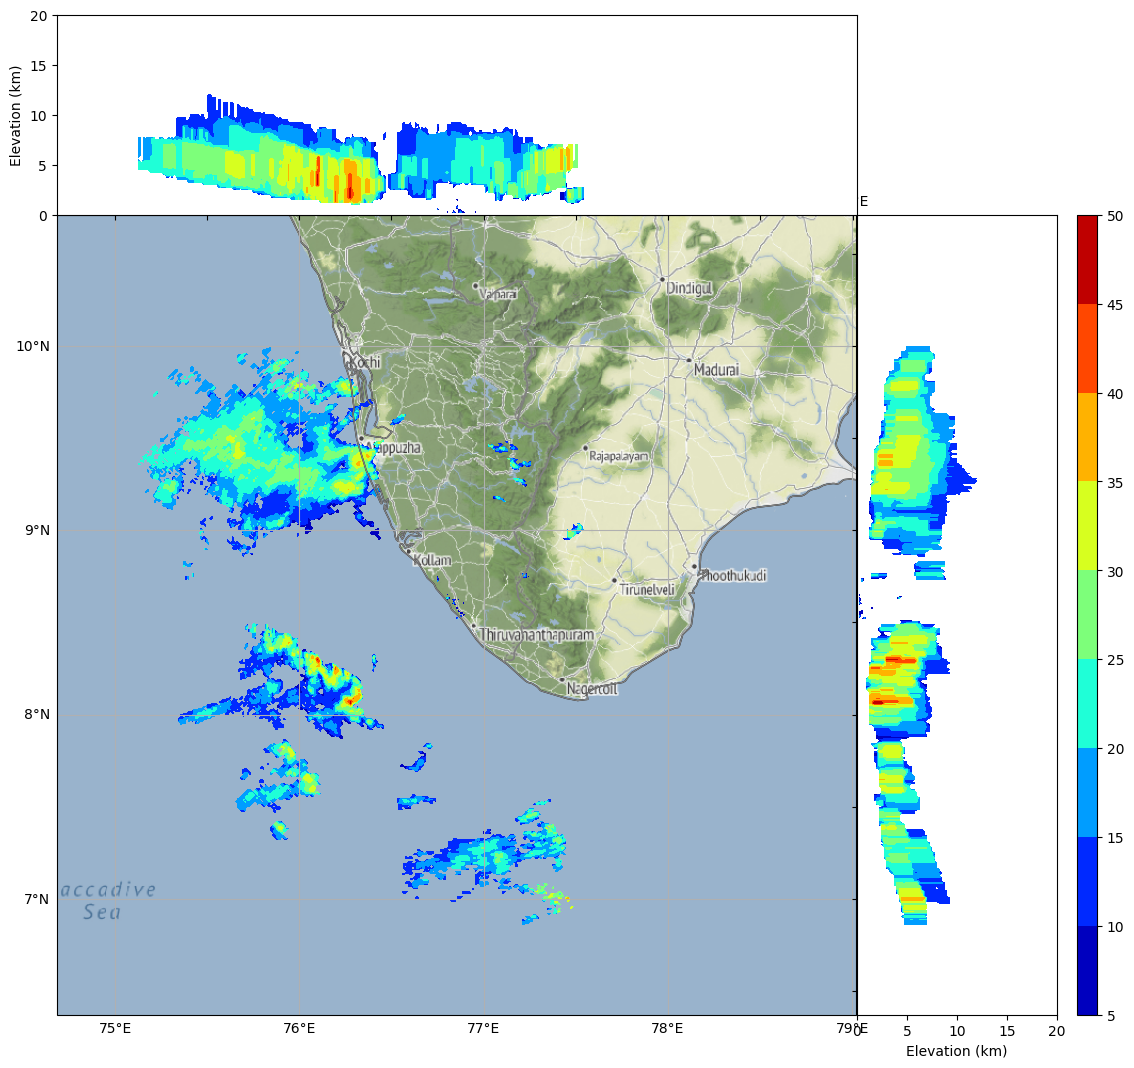

In [19]:
plt.figure(figsize=(10, 10))

# Define axes
left, bottom, width, height = 0.1, 0.1, 0.8, 0.2
ax_xy = plt.axes((left, bottom, width, width), projection=ccrs.PlateCarree()) 
ax_x = plt.axes((left, bottom + width, width, height)) 
ax_y = plt.axes((left + width, bottom, height, width))
ax_cb = plt.axes((left + width + height + 0.02, bottom, 0.02, width))

# Set the axis label formatters
ax_x.xaxis.set_major_formatter(NullFormatter())
ax_y.yaxis.set_major_formatter(NullFormatter())
plt.sca(ax_xy)

# Add basemap features (land, coastlines, etc.)
ax_xy.add_feature(cfeature.LAND, edgecolor='black')
ax_xy.add_feature(cfeature.COASTLINE)
ax_xy.add_feature(cfeature.BORDERS, linestyle=':')
ax_xy.add_feature(cfeature.LAKES, alpha=0.5)
ax_xy.add_feature(cfeature.RIVERS)
ax_xy.add_feature(cfeature.STATES, edgecolor='gray')

# Additional Geographical Features
stamen_terrain = StadiaMapsTiles(apikey='92c9d852-6357-413e-a8fd-9951a8f3e12d', style="stamen_terrain")
ax_xy.add_image(stamen_terrain, 8)
ax_xy.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)  # Add gridlines with labels

# Add radar circles
radar_center = (0, 0)
radar_circle = plt.Circle(radar_center, radius=100, transform=ccrs.PlateCarree(), color='red', fill=False, linewidth=2)
ax_xy.add_artist(radar_circle)

# Add the main contour plot
xy = ax_xy.contourf(longitude, latitude, ref2, levels=range(5, 55, 5), cmap='jet', transform=ccrs.PlateCarree())
cb = plt.colorbar(xy, cax=ax_cb)
plt.grid(color="grey", lw=1.5)

# Plot the other two cross-sectional contour plots
ax_x.contourf(longitude, heights / 1000, refyz, levels=range(5, 55, 5), cmap='jet')
ax_y.contourf(heights / 1000, latitude, refxz.T, levels=range(5, 55, 5), cmap='jet')

# Label the axes
ax_xy.set_xlabel('Longitude')
ax_xy.set_ylabel('Latitude')
ax_x.set_xlabel('')
ax_x.set_ylabel('Elevation (km)')
ax_y.set_ylabel('')
ax_y.set_xlabel('Elevation (km)')

# Adjust tick intervals for clarity
ax_xy.xaxis.set_major_locator(MultipleLocator(1))  # Adjust the interval for longitude
ax_xy.yaxis.set_major_locator(MultipleLocator(1))  # Adjust the interval for latitude

plt.show()


Text(0.5, 0, 'elevation (km)')

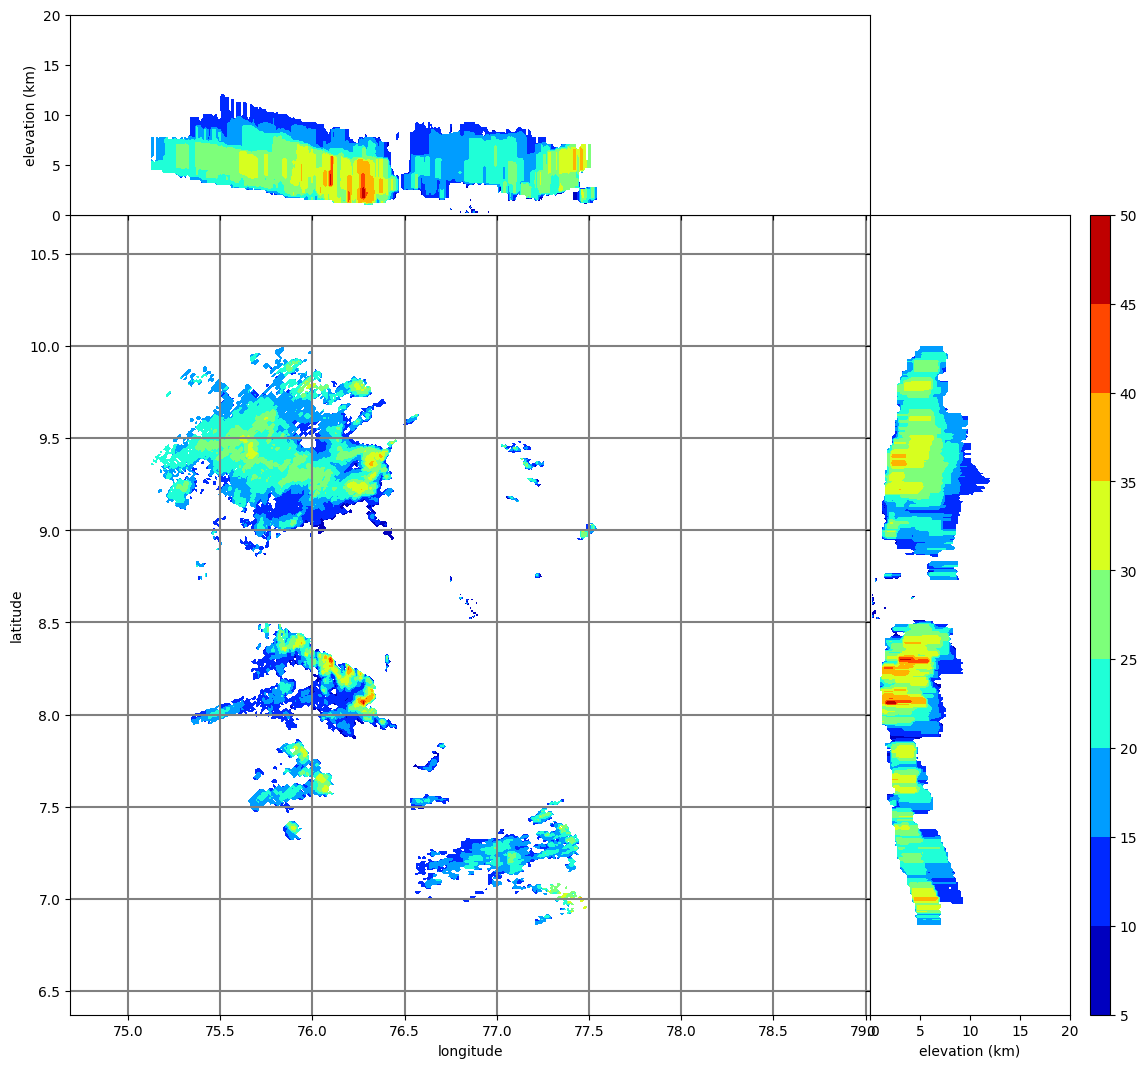

In [9]:
plt.figure(figsize=(10,10))

#define axes
left, bottom, width, height = 0.1, 0.1, 0.8, 0.2
ax_xy=plt.axes((left, bottom, width, width)) 
ax_x=plt.axes((left, bottom+width, width, height))
ax_y=plt.axes ((left+width, bottom, height, width))
ax_cb=plt.axes ((left+width+height+0.02, bottom, 0.02, width))

#set the axis label formatters
ax_x.xaxis.set_major_formatter(NullFormatter())
ax_y.yaxis.set_major_formatter (NullFormatter())
plt.sca(ax_xy)

xy=plt.contourf (longitude, latitude, ref2, levels=range (5,55,5),cmap='jet')
cb=plt.colorbar(xy, cax=ax_cb)
plt.grid(color="grey", lw=1.5)
ax_x.contourf (longitude,heights/1000, refyz, levels=range (5,55,5), cmap='jet')
ax_y.contourf(heights/1000, latitude, refxz.T, levels=range (5,55,5),cmap='jet')

#finally to Label the axes
ax_xy.set_xlabel('longitude')
ax_xy.set_ylabel('latitude')
ax_x.set_xlabel('')
ax_x.set_ylabel('elevation (km)')
ax_y.set_ylabel('')
ax_y.set_xlabel('elevation (km)')


In [10]:
# Visualize Radial Velocity
vel1=np.squeeze (radial_velocity, axis=0)
vel2=np.nanmean(vel1,axis=0)
velxz=np.nanmean(vel1,axis=2) 
velyz=np.nanmean (vel1, axis=1) 
velyz1=np.moveaxis (velyz,0,-1)

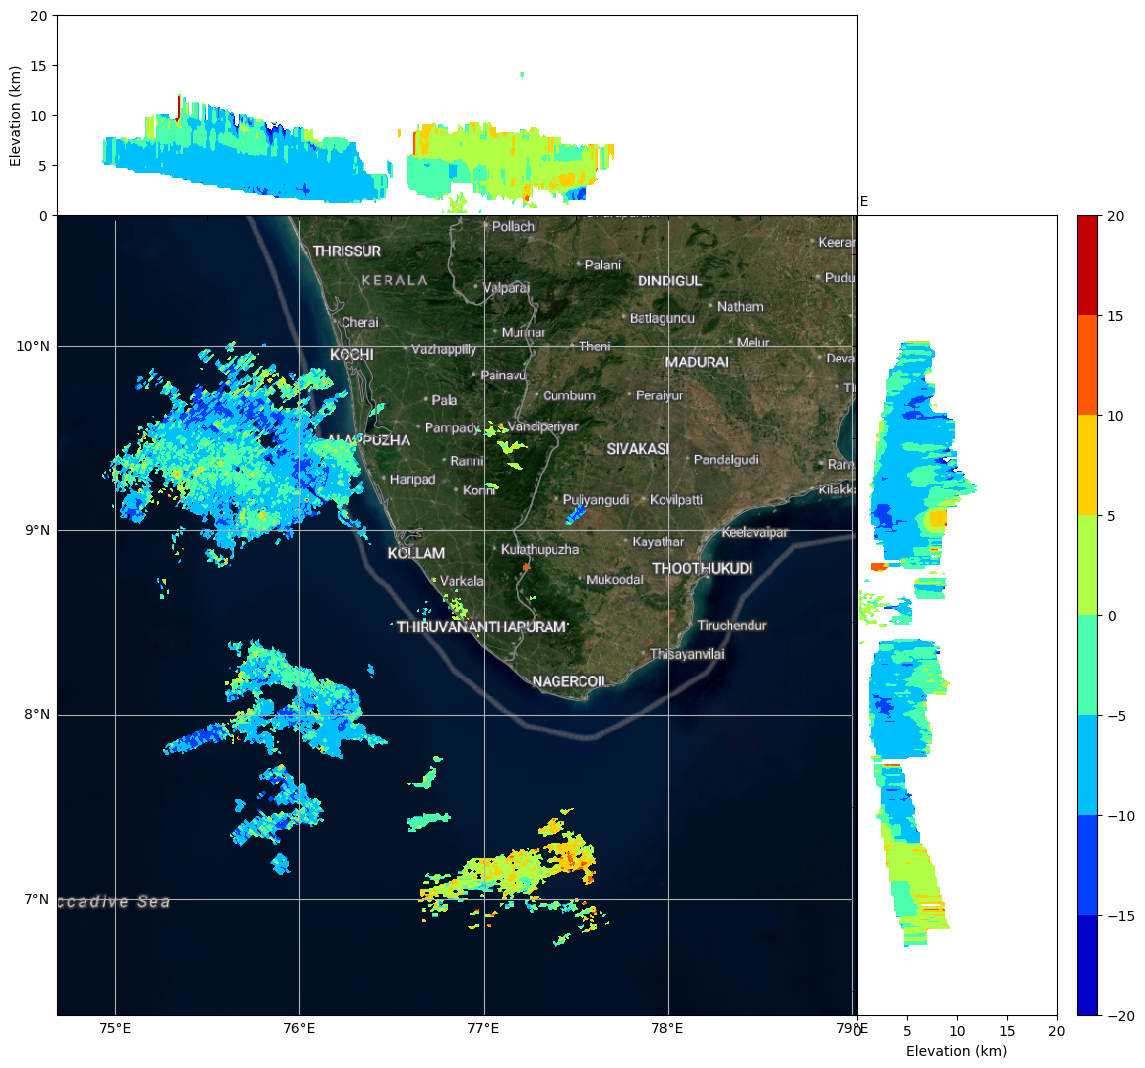

In [11]:
plt.figure(figsize=(10, 10))

# Define axes
left, bottom, width, height = 0.1, 0.1, 0.8, 0.2
ax_xy = plt.axes((left, bottom, width, width), projection=ccrs.PlateCarree()) 
ax_x = plt.axes((left, bottom + width, width, height)) 
ax_y = plt.axes((left + width, bottom, height, width))
ax_cb = plt.axes((left + width + height + 0.02, bottom, 0.02, width))

# Set the axis label formatters
ax_x.xaxis.set_major_formatter(NullFormatter())
ax_y.yaxis.set_major_formatter(NullFormatter())
plt.sca(ax_xy)

# Add basemap features (land, coastlines, etc.)
ax_xy.add_feature(cfeature.LAND, edgecolor='black')
ax_xy.add_feature(cfeature.COASTLINE)
ax_xy.add_feature(cfeature.BORDERS, linestyle=':')
ax_xy.add_feature(cfeature.LAKES, alpha=0.5)
ax_xy.add_feature(cfeature.RIVERS)
ax_xy.add_feature(cfeature.STATES, edgecolor='gray')

# Additional Geographical Features
stamen_terrain = StadiaMapsTiles(apikey='92c9d852-6357-413e-a8fd-9951a8f3e12d', style="alidade_satellite")
ax_xy.add_image(stamen_terrain, 8)
ax_xy.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)  # Add gridlines with labels

# Add the radar circle
radar_center = (0, 0)
radar_circle = plt.Circle(radar_center, radius=100, transform=ccrs.PlateCarree(), color='red', fill=False, linewidth=2)
ax_xy.add_artist(radar_circle)

# Add the main contour plot
xy = plt.contourf (longitude, latitude, vel2, levels=range(-20,25,5),cmap='jet')
cb =plt.colorbar (xy, cax=ax_cb)
plt.grid(color="grey", lw=1.5)

# Draw upper vertical profile
ax_x.contourf (longitude, heights/1000, velyz, levels=range(-20,25,5),cmap='jet')
ax_y.contourf(heights/1000, latitude, velxz.T, levels=range(-20,25,5),cmap='jet')

# Label the axes
ax_xy.set_xlabel('Longitude')
ax_xy.set_ylabel('Latitude')
ax_x.set_xlabel('')
ax_x.set_ylabel('Elevation (km)')
ax_y.set_ylabel('')
ax_y.set_xlabel('Elevation (km)')

# Adjust tick intervals for clarity
ax_xy.xaxis.set_major_locator(MultipleLocator(1))  # Adjust the interval for longitude
ax_xy.yaxis.set_major_locator(MultipleLocator(1))  # Adjust the interval for latitude

plt.show()

Text(0.5, 0, 'elevation (km)')

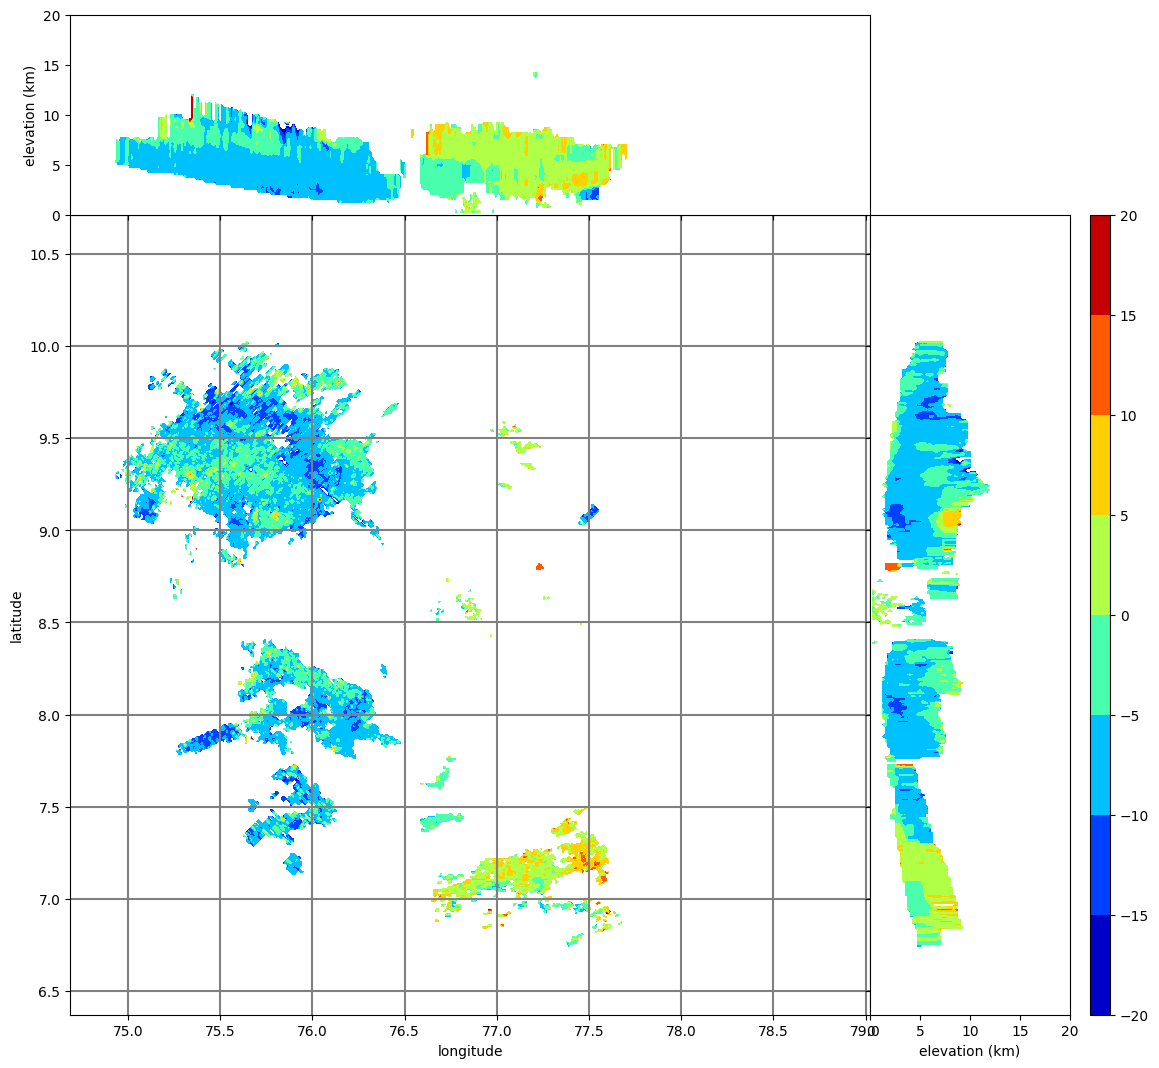

In [12]:
plt.figure(figsize=(10, 10))

# define axes
left, bottom, width, height = 0.1, 0.1, 0.8, 0.2
ax_xy = plt.axes((left, bottom, width, width))
ax_x = plt.axes((left, bottom+width, width, height))
ax_y = plt.axes((left + width, bottom, height, width))
ax_cb = plt.axes ((left + width + height + 0.02, bottom, 0.02, width))

# set axis label formatters
ax_x.xaxis.set_major_formatter (NullFormatter())
ax_y.yaxis.set_major_formatter (NullFormatter())
plt.sca(ax_xy) 

xy = plt.contourf (longitude, latitude, vel2, levels=range(-20,25,5),cmap='jet')
cb =plt.colorbar (xy, cax=ax_cb)
plt.grid(color="grey", lw=1.5)

#draw upper vertical profile
ax_x.contourf (longitude, heights/1000, velyz, levels=range(-20,25,5),cmap='jet')
ax_y.contourf(heights/1000, latitude, velxz.T, levels=range(-20,25,5),cmap='jet')

#Label axes
ax_xy.set_xlabel('longitude')
ax_xy.set_ylabel('latitude')
ax_x.set_xlabel('')
ax_x.set_ylabel('elevation (km)')
ax_y.set_ylabel('')
ax_y.set_xlabel('elevation (km)')

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Load Data
data = xr.open_dataset('D:\\Vinay Hajare\\VIT\\SEM 5\\EDI\\Nocasting of Precipitation Using C-Band Doppler Radar Data\\Data\\Aug24_L2C\RCTLS_31JUL2024_001453_L2C_STD.nc')

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [5]:
print(data)
print('-'*50)
print(data.variables)

<xarray.Dataset> Size: 150MB
Dimensions:    (time: 1, height: 81, lat: 481, lon: 481)
Coordinates:
  * time       (time) datetime64[ns] 8B 2024-07-31T00:14:53
  * height     (height) int32 324B 0 250 500 750 ... 19250 19500 19750 20000
    latitude   (lat) float16 2kB ...
    longitude  (lon) float16 2kB ...
Dimensions without coordinates: lat, lon
Data variables:
    DBZ        (time, height, lon, lat) float16 75MB ...
    VEL        (time, height, lon, lat) float16 75MB ...
Attributes:
    Conventions:  CF-1.7
    version:      Version 1.7
    description:  Volumetric Gridded Reflectivity and Radial Velocity Data fr...
    source:       ISRO RCTLS C-Band DWR (dprf mode) data
    institution:  Space Applications Centre, ISRO, Ahmedabad
    title:        3D Volumetric Gridded RCTLS DWR Data
    history:      Created on 2024-07-31 00:14:53
    comment:      This work has been done as part of the TDP/R&D Project: Str...
